In [32]:
library(dplyr)
library(ggplot2)
library(ggtree)
library(stringr)
library(ggpubr)

make_dend <- function(treefile, metafile) {
    
    tree <- read.tree(treefile) #'data/31k10000.nwck')
    meta = readxl::read_excel(metafile) #'data/41467_2022_34312_MOESM3_ESM.xlsx')
    
    tip.labels <- dplyr::as_tibble(tree$tip.label) %>% #dplyr::as_tibble(stringr::str_split(tree$tip.label, '/', simplify = T)[,2]) %>%
        rename(label = value) %>%
        mutate(
            tip = str_split(label, '/', simplify=T)[,2]
        ) %>%
        left_join(meta, by = c("tip" = "ena_run_acc")) %>%
        select(label, tip, country) %>%
        mutate(
            Location = case_when(
                str_starts(tip, "ra") ~ "Denmark",
                str_starts(tip, "rd") ~  "Denmark",
                str_starts(tip, "rl") ~ "Denmark",
#                str_starts(tip,"bucket") ~ "Denmark",
                TRUE ~ country
            ),
            Group = case_when(
                str_starts(tip,"bucket") ~ "Technical replicate",
                str_starts(tip, "r") ~ "Copenhagen sewage",
                TRUE ~ "Global sewage"
            )
        )
    
    # extract title
    fname <- str_split(str_split(treefile, '/', simplify=T)[3], '\\.', simplify=T)[1]
    params = str_split(fname, 'k', simplify=T)
    
    p <- ggtree(tree) %<+% 
        tip.labels +
        geom_tippoint(aes(shape=Group, color=Location), size=3) +
        #geom_tiplab(aes(label=tip)) +
        theme_tree() +
        ggtitle(paste0("k=",params[1], ", s=", params[2]))
    
    outname <- paste0("figures/trees/", params[1], "k", params[2], ".png") 
    ggsave(filename = outname,width = 5, height=10)
    
    return(list(p = p, k = params[1], s=params[2]))
}


treePlots = c()
for (f in list.files('data/trees', full.names = T)){
    print(f)
    p = make_dend(
        treefile=f, 
        meta='data/41467_2022_34312_MOESM3_ESM.xlsx'
    )
    
    treePlots[[f]] = p
    
}

system(paste("convert", paste(list.files('figures/trees', full.names = T), sep=' ', collapse = ' '), "figures/mash_trees.pdf"))

[1] "data/trees/16k1000.nwck"
[1] "data/trees/16k10000.nwck"
[1] "data/trees/16k100000.nwck"
[1] "data/trees/16k1000000.nwck"
[1] "data/trees/21k1000.nwck"
[1] "data/trees/21k10000.nwck"
[1] "data/trees/21k100000.nwck"
[1] "data/trees/21k1000000.nwck"
[1] "data/trees/27k1000.nwck"
[1] "data/trees/27k10000.nwck"
[1] "data/trees/27k100000.nwck"
[1] "data/trees/27k1000000.nwck"
[1] "data/trees/31k1000.nwck"
[1] "data/trees/31k10000.nwck"
[1] "data/trees/31k100000.nwck"
[1] "data/trees/31k1000000.nwck"


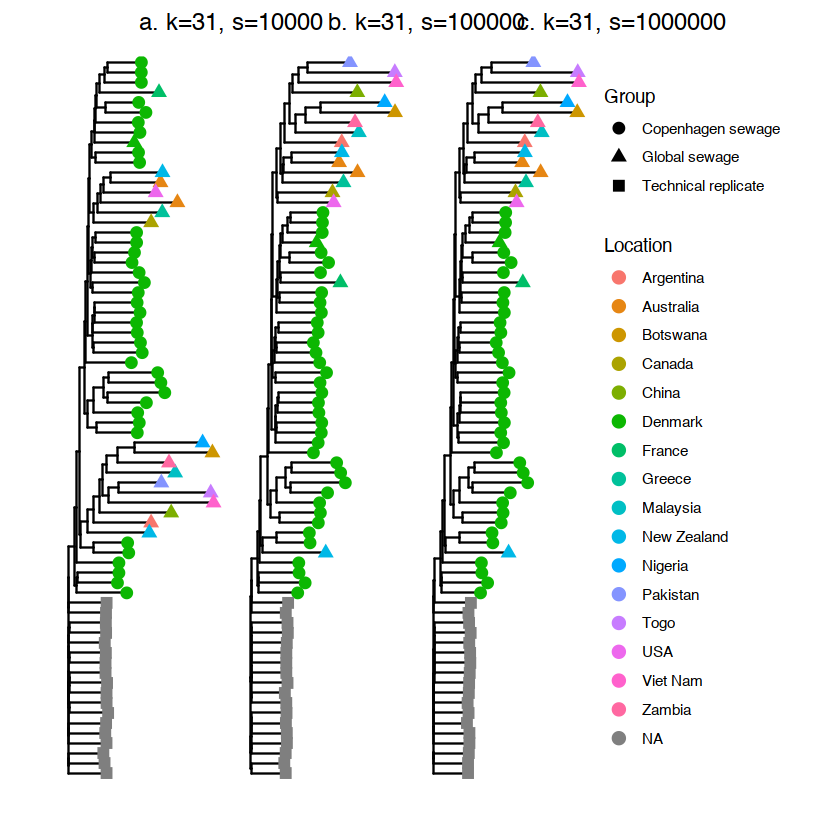

In [41]:
ggarrange(
    treePlots[["data/trees/31k10000.nwck"]][["p"]] + theme(plot.title = element_blank()), 
    treePlots[["data/trees/31k100000.nwck"]][["p"]] + theme(plot.title = element_blank()), 
    treePlots[["data/trees/31k1000000.nwck"]][["p"]] + theme(plot.title = element_blank()),
    nrow=1, ncol=3,
    labels = c('a. k=31, s=10000', 'b. k=31, s=100000', 'c. k=31, s=1000000'),
    vjust = -1,
    common.legend = T,
    legend = 'right'
) +
theme(plot.margin = unit(c(1,1,1,1), "cm"))
ggsave('figures/mash_combined_tree.png', width = 12, height=10, limitsize = F)